# Challenge 3

In [1]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Import the titanic file. Name your dataset `titanic`.

In [2]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [4]:
#your code here

titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [5]:
# your code here- numerical variable

titanic.select_dtypes(exclude=object).head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [6]:
#your code here- categorical variable

titanic.select_dtypes(exclude=['int','float']).head()

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S


#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [14]:
# your code here

plt.style.use('classic')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12,6)

#### Use the appropriate visulalization to show the distribution of the column `Age`

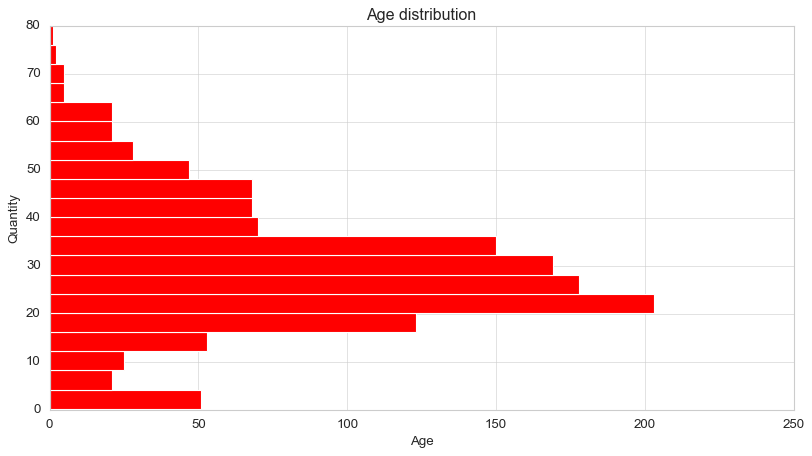

In [20]:
# your code here
hist_data = titanic['Age']
plt.hist(hist_data, bins=20, color = 'r', orientation = 'horizontal')
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Quantity')
plt.show()

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

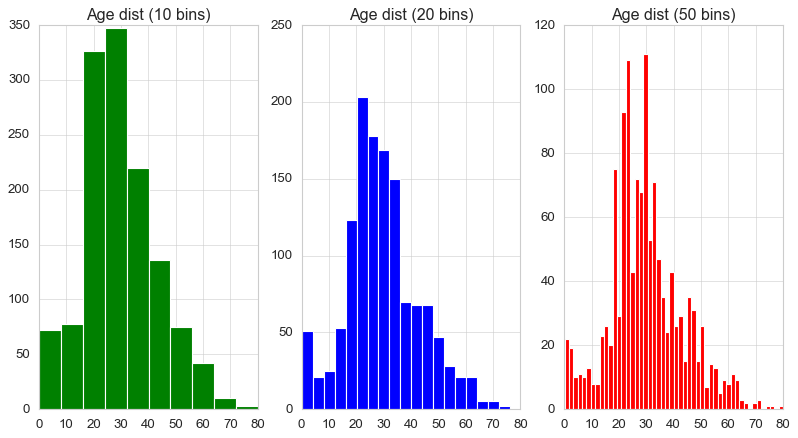

In [25]:
# your code here
plt.subplot(1,3,1)
plt.hist(hist_data, bins = 10, color = 'g')
plt.title('Age dist (10 bins)')
plt.subplot(1,3,2)
plt.hist(hist_data, bins = 20, color = 'b')
plt.title('Age dist (20 bins)')
plt.subplot(1,3,3)
plt.hist(hist_data, bins = 50, color = 'r')
plt.title('Age dist (50 bins)')
plt.show()

#### Whether the bin size affects your plot? Why?

### Comment: 

Yes, because the bins "group by" the number you compute, until the next "x" value. So, if you have a 10 bins histogram, it would be "thicker" than a 50 bins histogram, that include more bars. 

#### Use seaborn to show the distribution of the column `Age`

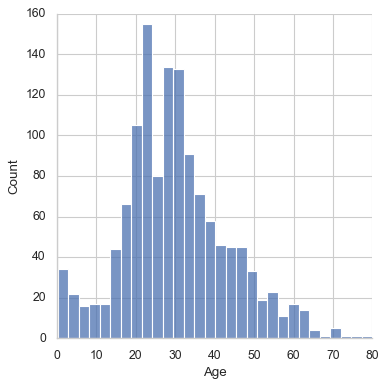

In [46]:
# your code here
sns.set(rc={'figure.figsize':(10,10)})
sns.set(style='whitegrid')
sns.displot(hist_data, bins = 30, color = 'b')

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

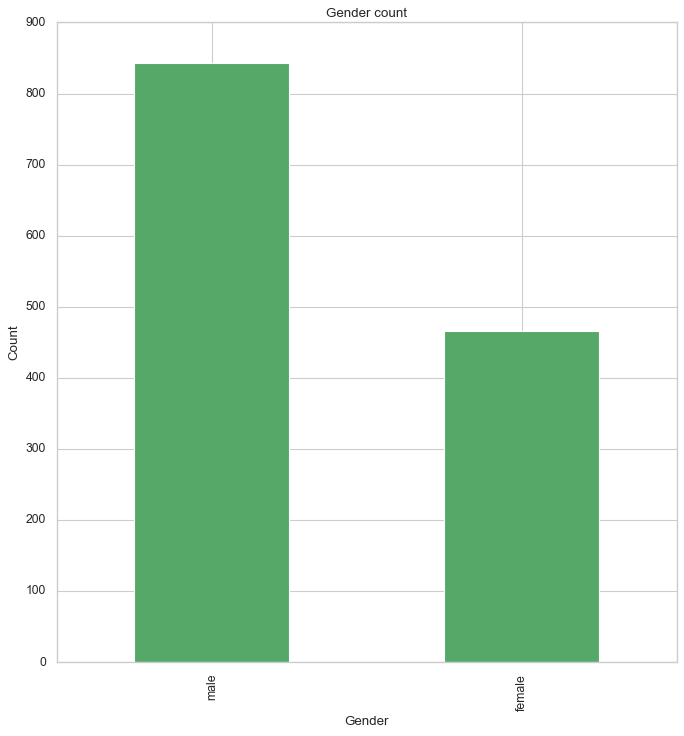

In [55]:
# your code here- 1st way
titanic['Gender'].value_counts().plot(kind='bar', color = 'g')
plt.title('Gender count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='count'>

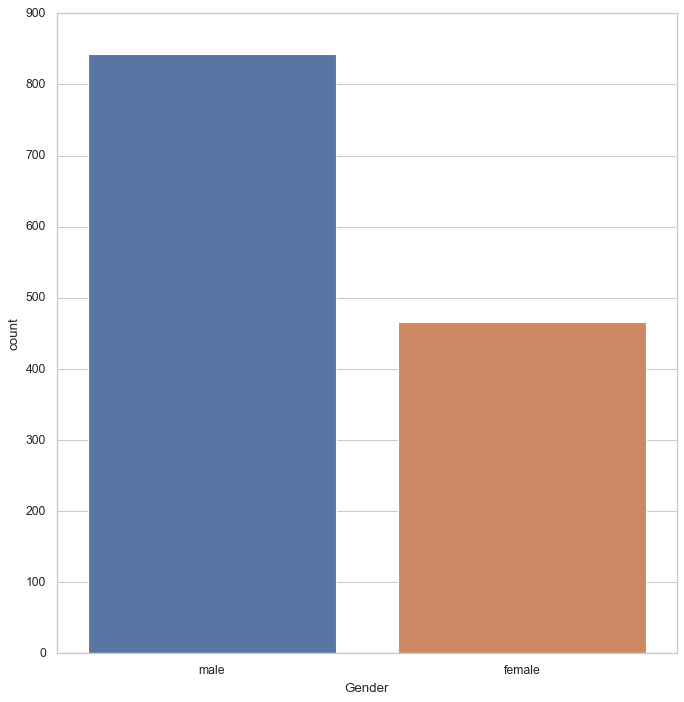

In [63]:
# your code here- 2nd way

sns.countplot(x = 'Gender', data = titanic)

#### Use the appropriate plot to visualize the column `Pclass` 


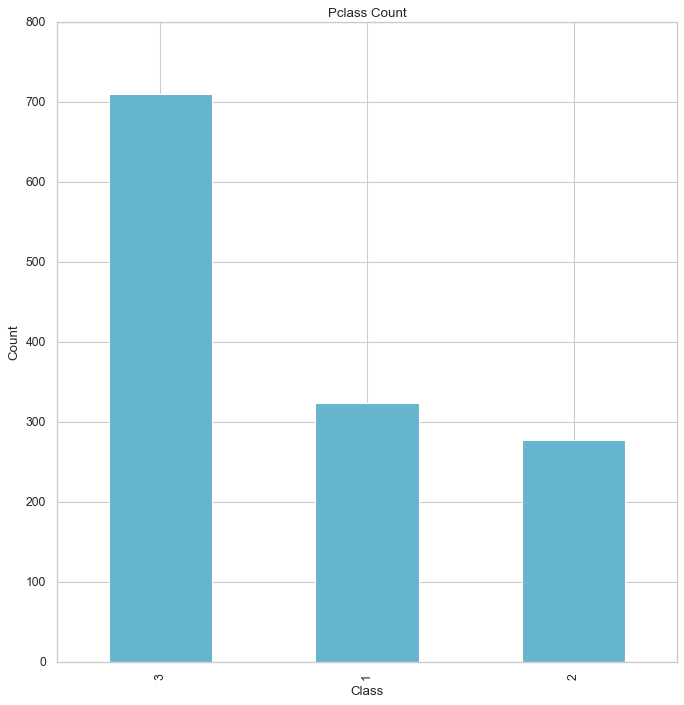

In [73]:
# your code here

titanic['Pclass'].value_counts().plot(kind = 'bar', color = 'c')
plt.title('Pclass Count')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

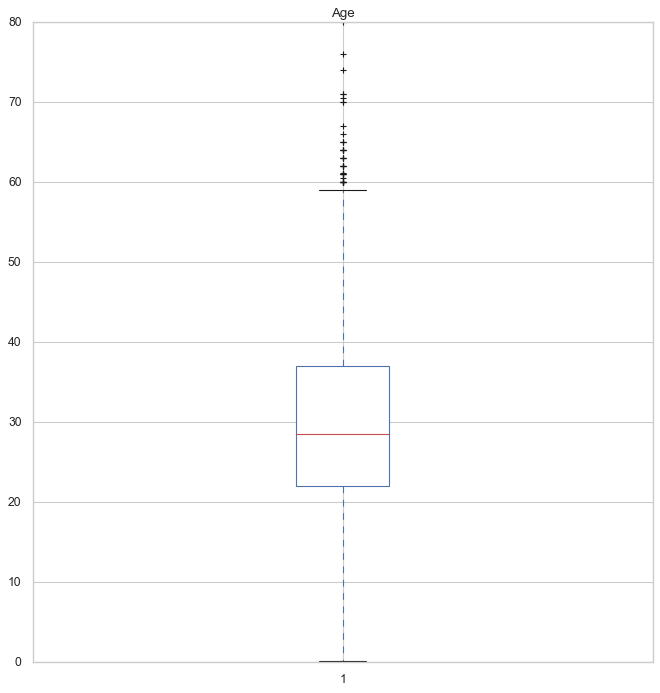

In [76]:
# your code here

plt.boxplot(hist_data, patch_artist = True)
plt.title('Age')
plt.show()

#### What does the previous plot tell you about the feature `Age`? Comment.

### Comment: 

1. There is a concentration of age between 20 years and 38 (approx).
2. The median of age is nearly the 30's, probably is between 28-29 years. 
3. Our minimum value is 0, so probably there were newly born and our max age is 58-59 years. 
4. Althought our max values, we have outliers that range between 60 years and 76 years. 

#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

<AxesSubplot:xlabel='Age'>

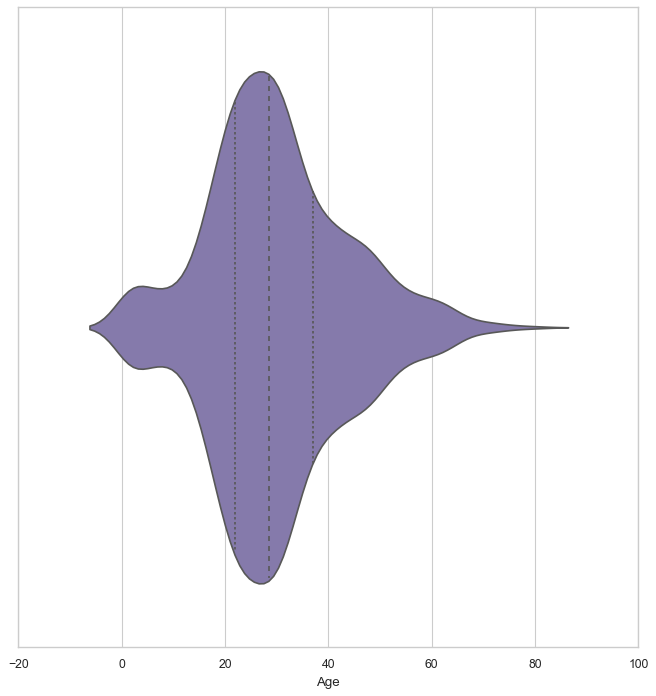

In [90]:
#your code here

sns.violinplot(x = 'Age', data=titanic, inner = 'quartile', color = 'm')

#### What additional information in the previous plot provide you about the feature `Age`? Comment.

### Comment: 

With the violinplot we confirm the concentration that we have between ages of 20 to 40 years old. 

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

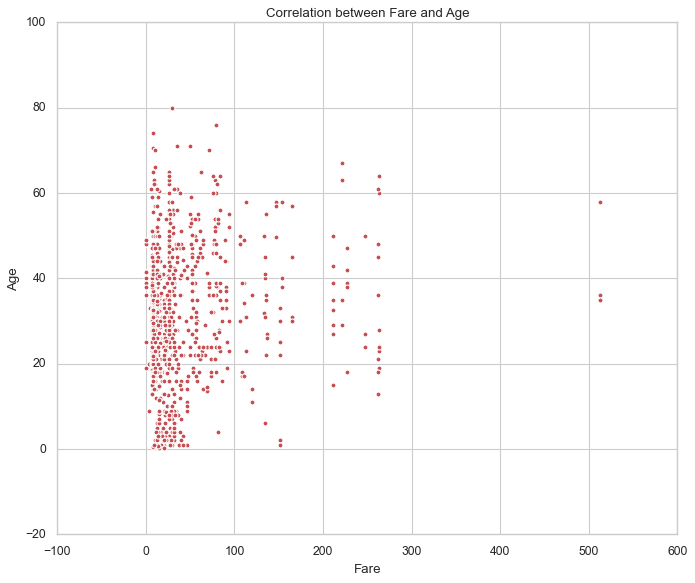

In [93]:
#your code-1st way
x = titanic['Fare']
y = titanic['Age']

plt.figure(figsize = (10,8))
plt.scatter(x,y, c = 'r')
plt.title('Correlation between Fare and Age')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.show()

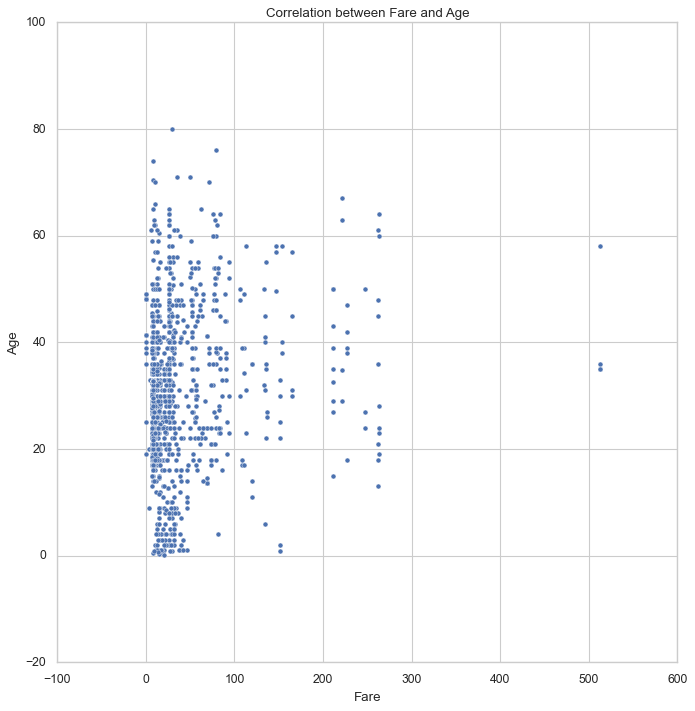

In [96]:
# your code-2nd way

sns.scatterplot(x = 'Fare', y = 'Age', data = titanic)
plt.title('Correlation between Fare and Age')
plt.show()

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

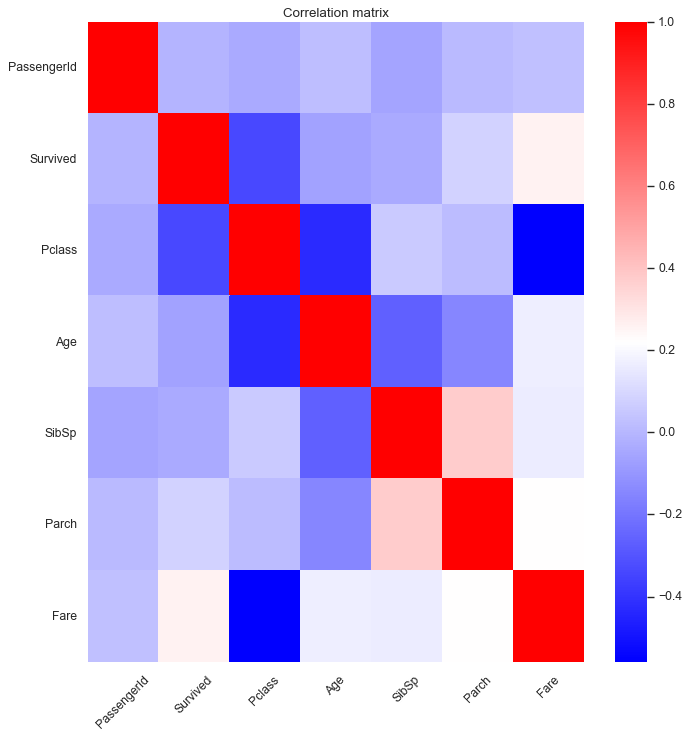

In [106]:
#your code here

sns.heatmap(titanic.corr(), cmap='bwr')
plt.title('Correlation matrix')
plt.yticks(rotation = 'horizontal')
plt.xticks(rotation = 45)
plt.show()

#### According to the previous plot, what are the most correlated feature? Comment.

### Comment: 

According this heatmap, the variables SibSp and Parch are the most correlated

#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

In [ ]:
#your code here


#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

In [ ]:
#your code here
